In [11]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
==============================linear-fstw
(20, 4, 4)


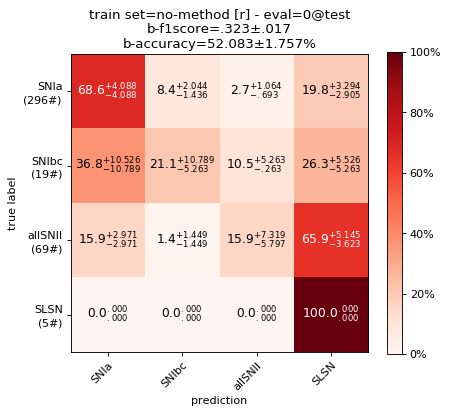

['SLSN', 'SNIa', 'SNIbc', 'allSNII']
features:
[1#] Amplitude_g=.0732
[2#] SPM_t0_g=.0702
[3#] SPM_tau_rise_r=.0678
[4#] SPM_gamma_r=.0630
[5#] Amplitude_r=.0432
[6#] SPM_gamma_g=.0400
[7#] SPM_tau_fall_g=.0339
[8#] SPM_tau_rise_g=.0316
[9#] SPM_beta_r=.0297
[10#] SPM_tau_fall_r=.0279
(18, 4, 4)


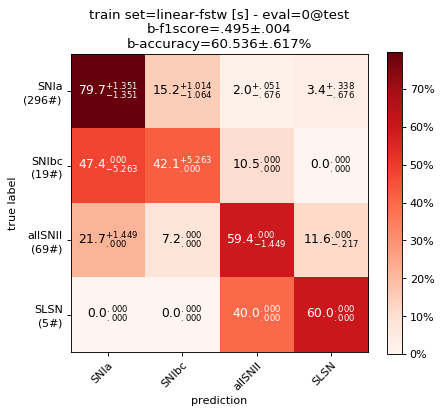

['SLSN', 'SNIa', 'SNIbc', 'allSNII']
features:
[1#] SPM_t0_g=.1618
[2#] SPM_tau_rise_r=.0735
[3#] LinearTrend_g=.0522
[4#] SPM_beta_r=.0502
[5#] SPM_tau_fall_r=.0376
[6#] SPM_tau_fall_g=.0367
[7#] SPM_gamma_r=.0329
[8#] SPM_gamma_g=.0292
[9#] Meanvariance_r=.0235
[10#] LinearTrend_r=.0198
==============================bspline-fstw


KeyError: 'test'

In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import search_for_filedirs, gather_files_by_kfold
from flamingchoripan.cuteplots.cm_plots import plot_custom_confusion_matrix
import matplotlib.pyplot as plt
from flamingchoripan.datascience.xerror import XError
from IPython.display import display

methods = [
    'linear-fstw',
    'bspline-fstw',
    #'spm-mle-fstw',
    'spm-mcmc-fstw',
    #'spm-mle-estw',
    'spm-mcmc-estw',
]
#methods = ['spm-mcmc-estw']
eval_lcset_name = 'test' # val test
kf = '0'

for method in methods:
    print('='*30+method)
    #for train_config in ['r', 's']:
    for train_config in ['r', 's', 'r+s']:
        rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
        files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
        class_names = files[0]()['lcset_info']['class_names']
        cms = np.concatenate([f()['cm'][None] for f in files], axis=0)
        f1score_xe = XError([f()['metrics_dict']['b-f1score'] for f in files])
        accuracy_xe = XError([f()['metrics_dict']['b-accuracy'] for f in files])
        print(cms.shape)

        ### plot cm
        _title = 'no-method [r]' if train_config=='r' else f'{method} [{train_config}]'
        title = ''
        title += f'train set={_title} - eval={kf}@{eval_lcset_name}'+'\n'
        title += f'b-f1score={f1score_xe}'+'\n'
        title += f'b-accuracy={accuracy_xe}%'+'\n'
        cm_kwargs = {
            'title':title[:-1],
            'figsize':(6,5),
            'new_order_classes':['SNIa', 'SNIbc', 'allSNII', 'SLSN'],
        }
        fig, ax = plot_custom_confusion_matrix(cms, class_names, **cm_kwargs)
        #print(files[0]()['features'])
        plt.show()
        print(class_names)
        print(files[0]()['rank'])
        df = files[0]()['wrongs_df']
        #display(df[df['_y']==0])
        #display(df[df['_y']==2])

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.xerror import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

metrics = [
    'b-accuracy',
    'b-f1score',
    'b-gmean',
    #'b-dpower',
    'b-xentropy',
]
info_df = DFBuilder()
for metric in metrics:
    #for train_config in ['r', 's', 'r+s']:
    for train_config in ['r', 's']:
        d = {}
        for method in methods:
            rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
            files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
            metric_xe = XError([f()['metrics_dict'][metric] for f in files])
            d[method] = metric_xe
            #print(len(metric_xe))

        info_df.append(f'metric={metric} [{train_config}]', d)
        
latex_kwargs = {
    'caption':f'eval-set={kf}@{eval_lcset_name}',
    'label':'?',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
print('% \multicolumn{3}{c|}{}')
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval-set=0@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
metric & linear-fstw & bspline-fstw & spm-mcmc-fstw & spm-mcmc-estw \srule\\\hline\hline
b-accuracy [r] & 44.358$\pm$1.165 & 44.601$\pm$.825 & 49.455$\pm$1.455 & 59.531$\pm$2.853  \srule\\
b-accuracy [s] & 53.963$\pm$2.769 & 43.010$\pm$1.453 & 51.011$\pm$.938 & 37.867$\pm$.419  \srule\\
b-f1score [r] & .245$\pm$.011 & .254$\pm$.008 & .284$\pm$.009 & .452$\pm$.012  \srule\\
\hline
b-f1score [s] & .481$\pm$.015 & .255$\pm$.014 & .463$\pm$.007 & .357$\pm$.005  \srule\\
b-gmean [r] & .507$\pm$.019 & .510$\pm$.012 & .557$\pm$.017 & .718$\pm$.018  \srule\\
b-gmean [s] & .671$\pm$.025 & .515$\pm$.019 & .645$\pm$.007 & .433$\pm$.007  \srule\\
\hline
b-xen

,linear-fstw,bspline-fstw,spm-mcmc-fstw,spm-mcmc-estw
metric=b-accuracy [r],44.358±1.165,44.601±.825,49.455±1.455,59.531±2.853
metric=b-accuracy [s],53.963±2.769,43.010±1.453,51.011±.938,37.867±.419
metric=b-f1score [r],.245±.011,.254±.008,.284±.009,.452±.012
metric=b-f1score [s],.481±.015,.255±.014,.463±.007,.357±.005
metric=b-gmean [r],.507±.019,.510±.012,.557±.017,.718±.018
metric=b-gmean [s],.671±.025,.515±.019,.645±.007,.433±.007
metric=b-xentropy [r],1.141±.004,1.141±.004,1.141±.005,1.020±.003
metric=b-xentropy [s],.984±.010,1.246±.005,.992±.008,1.121±.005


In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.xerror import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

info_df = DFBuilder()
train_config = 's' # r s r+s
rank_n = 10
for k in range(0, rank_n):
    d = {}
    for method in methods:
        rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
        files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
        rank = files[0]()['rank']
        #print(rank)
        feature_name, feature_p,_ = rank[k]
        feature_name = feature_name.replace('_', '-')
        d[f'{method} [{train_config}]'] = f'{feature_name} ({feature_p*100:.3f}%)'

    info_df.append(f'rank={k+1}', d)

latex_kwargs = {
    'caption':f'eval-set={kf}@{eval_lcset_name}',
    'label':'?',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval-set=0@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
rank & linear-fstw [s] & bspline-fstw [s] & spm-mcmc-fstw [s] & spm-mcmc-estw [s] \srule\\\hline\hline
1 & LinearTrend-g (14.112\%) & Amplitude-g (15.501\%) & LinearTrend-g (11.884\%) & SPM-gamma-r (13.439\%)  \srule\\
2 & SPM-tau-rise-r (7.738\%) & SPM-tau-rise-r (8.304\%) & SPM-gamma-r (8.397\%) & SPM-tau-rise-r (8.852\%)  \srule\\
3 & SPM-beta-r (5.302\%) & MHPS-ratio-g (4.234\%) & SPM-tau-rise-r (8.309\%) & SPM-beta-r (6.384\%)  \srule\\
4 & SPM-tau-fall-g (4.430\%) & Amplitude-r (3.979\%) & SPM-beta-r (6.651\%) & SPM-tau-rise-g (5.639\%)  \srule\\
5 & SPM-tau-fall-r (4.166\%) & MHPS-non-zero-g (2.798\%) & SPM-tau-fall-r (4.803\%) & SmallKurto

,linear-fstw [s],bspline-fstw [s],spm-mcmc-fstw [s],spm-mcmc-estw [s]
rank=1,LinearTrend-g (14.112%),Amplitude-g (15.501%),LinearTrend-g (11.884%),SPM-gamma-r (13.439%)
rank=2,SPM-tau-rise-r (7.738%),SPM-tau-rise-r (8.304%),SPM-gamma-r (8.397%),SPM-tau-rise-r (8.852%)
rank=3,SPM-beta-r (5.302%),MHPS-ratio-g (4.234%),SPM-tau-rise-r (8.309%),SPM-beta-r (6.384%)
rank=4,SPM-tau-fall-g (4.430%),Amplitude-r (3.979%),SPM-beta-r (6.651%),SPM-tau-rise-g (5.639%)
rank=5,SPM-tau-fall-r (4.166%),MHPS-non-zero-g (2.798%),SPM-tau-fall-r (4.803%),SmallKurtosis-g (5.184%)
rank=6,SPM-gamma-r (3.454%),PercentAmplitude-g (2.571%),SPM-tau-fall-g (3.158%),SPM-tau-fall-r (4.055%)
rank=7,MHPS-ratio-g (3.299%),ExcessVar-r (2.437%),LinearTrend-r (2.654%),FluxPercentileRatioMid50-r (3.250%)
rank=8,LinearTrend-r (3.288%),MHPS-high-g (2.304%),PairSlopeTrend-g (2.511%),SPM-tau-fall-g (2.061%)
rank=9,MHPS-non-zero-g (2.312%),SPM-gamma-r (2.304%),MHPS-ratio-g (2.418%),PercentDifferenceFluxPercentile-g (1.930%)
rank=10,SPM-tau-rise-g (1.925%),SPM-tau-fall-g (2.242%),SPM-tau-rise-g (2.081%),MHPS-non-zero-g (1.924%)
